# Import Libraries

In [1]:
!pip install -r /content/src/requirements.txt

In [1]:
from src.models_lt import *
from src.utils import *


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
train_transforms = get_train_transforms()
test_transforms = get_test_transforms()

# Dataloader Arguments & Test/Train Dataloaders


In [3]:
train_loader,test_loader = get_cifar_data(train_transforms,test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(train_loader)

98

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [5]:
# !pip install torchsummary
model = CustomResnet()
input_shape = (3,32,32)
get_model_summary(model,input_shape)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            1,728
├─BatchNorm2d: 1-2                       128
├─Sequential: 1-3                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Sequential: 3-5              --
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─Conv2d: 3-8                  36,864
|    |    └─BatchNorm2d: 3-9             128
|    |    └─Sequential: 3-10             --
├─Sequential: 1-4                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 73,728
|    |    └─BatchNorm2d: 3-12            256
|    |    └─Conv2d: 3-13                 147,456
|    |    └─BatchNorm2d: 3-14        

# Training and Testing

All right, so we have 24M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments.

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/98 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.04E-01


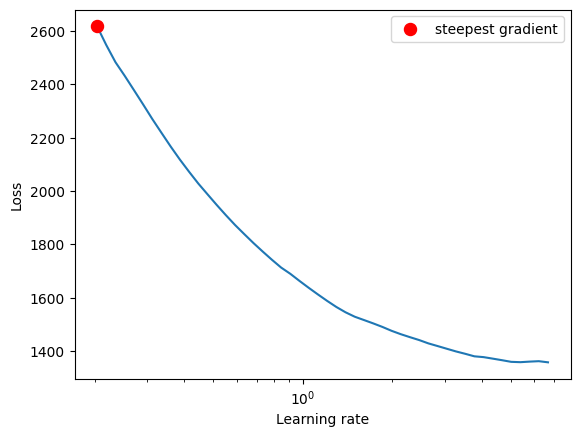

In [ ]:
# from torch_lr_finder import LRFinder

# model =  CustomResnet().to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.1,weight_decay = 1e-4)
# criterion = nn.CrossEntropyLoss(reduction='sum')
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(train_loader, end_lr=100, num_iter=len(train_loader))
# lr_finder.plot() # to inspect the loss-learning rate graph
# lr_finder.reset()

In [6]:
import lightning.pytorch as pl


model =  CustomResnet()
trainer = pl.Trainer()
trainer.fit(model,train_loader,test_loader)

EPOCH: 0


Loss=531.1365356445312 Batch_id=97 Accuracy=37.31: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 2.2854, Accuracy: 2981/10000 (29.81%)

EPOCH: 1


Loss=432.5473327636719 Batch_id=97 Accuracy=49.44: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 2.4705, Accuracy: 4068/10000 (40.68%)

EPOCH: 2


Loss=338.6341857910156 Batch_id=97 Accuracy=59.19: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 1.3571, Accuracy: 5511/10000 (55.11%)

EPOCH: 3


Loss=290.05059814453125 Batch_id=97 Accuracy=65.60: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 1.2718, Accuracy: 6271/10000 (62.71%)

EPOCH: 4


Loss=240.6939239501953 Batch_id=97 Accuracy=70.94: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 1.1780, Accuracy: 6499/10000 (64.99%)

EPOCH: 5


Loss=217.4153594970703 Batch_id=97 Accuracy=74.97: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 1.0915, Accuracy: 6743/10000 (67.43%)

EPOCH: 6


Loss=191.1654510498047 Batch_id=97 Accuracy=77.89: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.7414, Accuracy: 7574/10000 (75.74%)

EPOCH: 7


Loss=170.22695922851562 Batch_id=97 Accuracy=80.22: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.6420, Accuracy: 7779/10000 (77.79%)

EPOCH: 8


Loss=211.05551147460938 Batch_id=97 Accuracy=82.54: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.5936, Accuracy: 8013/10000 (80.13%)

EPOCH: 9


Loss=154.20738220214844 Batch_id=97 Accuracy=83.99: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.6723, Accuracy: 7942/10000 (79.42%)

EPOCH: 10


Loss=151.45721435546875 Batch_id=97 Accuracy=85.61: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.5683, Accuracy: 8219/10000 (82.19%)

EPOCH: 11


Loss=121.294189453125 Batch_id=97 Accuracy=87.03: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.4472, Accuracy: 8564/10000 (85.64%)

EPOCH: 12


Loss=130.77484130859375 Batch_id=97 Accuracy=88.77: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.4170, Accuracy: 8659/10000 (86.59%)

EPOCH: 13


Loss=93.40885162353516 Batch_id=97 Accuracy=90.37: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.3607, Accuracy: 8819/10000 (88.19%)

EPOCH: 14


Loss=86.23318481445312 Batch_id=97 Accuracy=91.63: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.3452, Accuracy: 8952/10000 (89.52%)

EPOCH: 15


Loss=53.477569580078125 Batch_id=97 Accuracy=93.05: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.3199, Accuracy: 8998/10000 (89.98%)

EPOCH: 16


Loss=48.48988342285156 Batch_id=97 Accuracy=94.22: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.3042, Accuracy: 9099/10000 (90.99%)

EPOCH: 17


Loss=39.09272384643555 Batch_id=97 Accuracy=95.14: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.3003, Accuracy: 9105/10000 (91.05%)

EPOCH: 18


Loss=45.452842712402344 Batch_id=97 Accuracy=95.81: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.3004, Accuracy: 9135/10000 (91.35%)

EPOCH: 19


Loss=51.87670135498047 Batch_id=97 Accuracy=96.08: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.2987, Accuracy: 9136/10000 (91.36%)



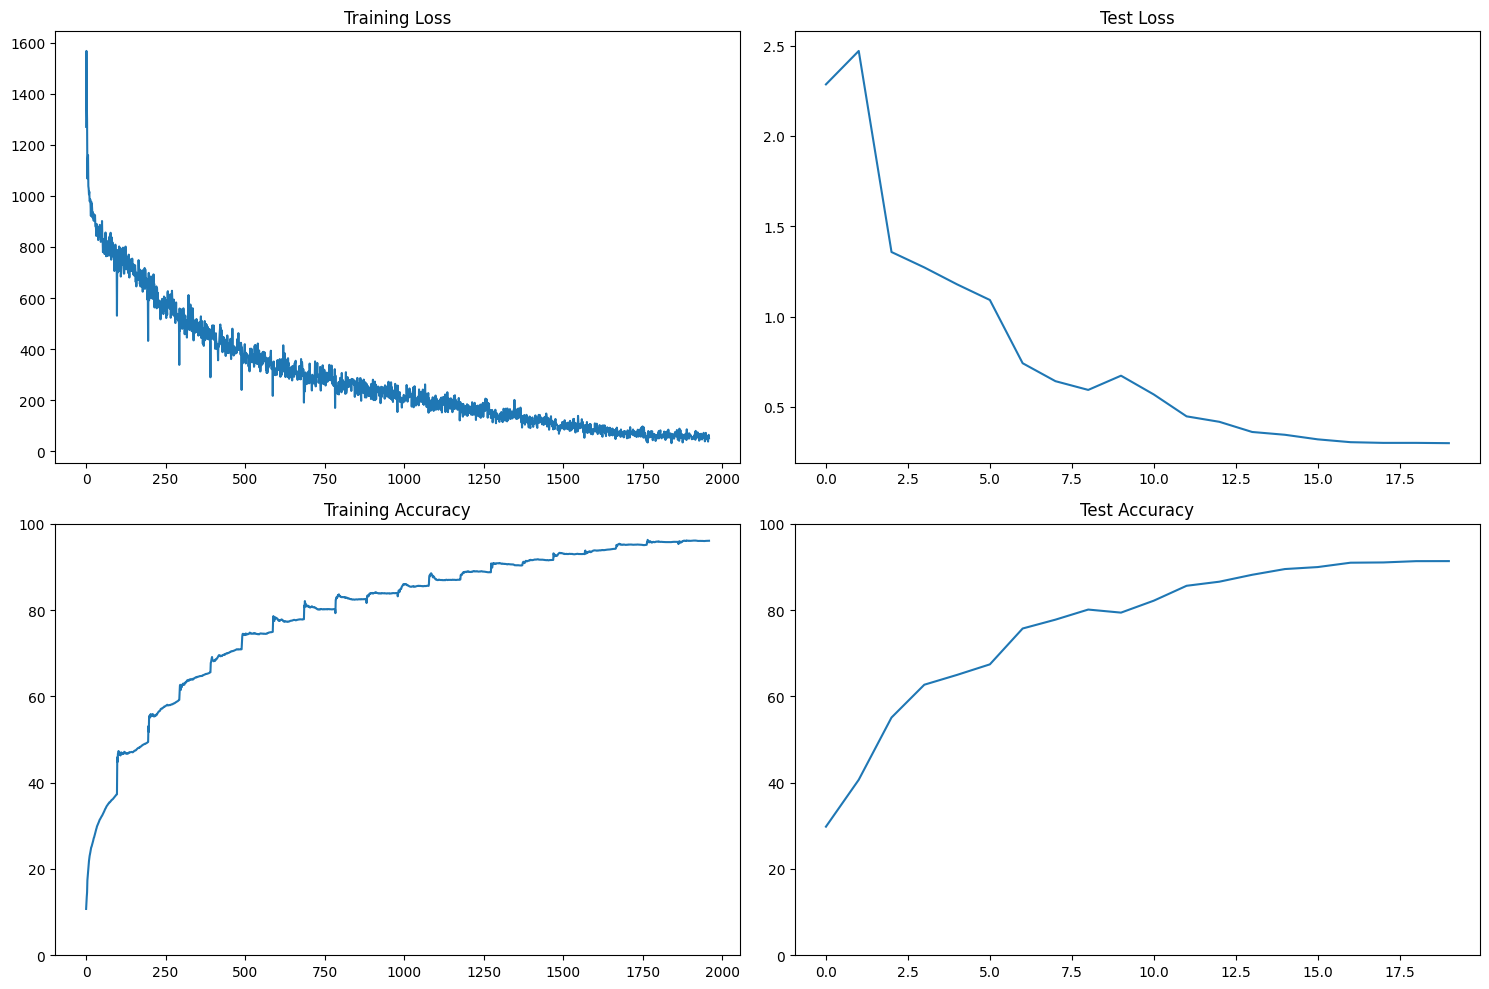

In [7]:
%matplotlib inline
plot_metrics(train_losses,test_losses,train_acc,test_acc)

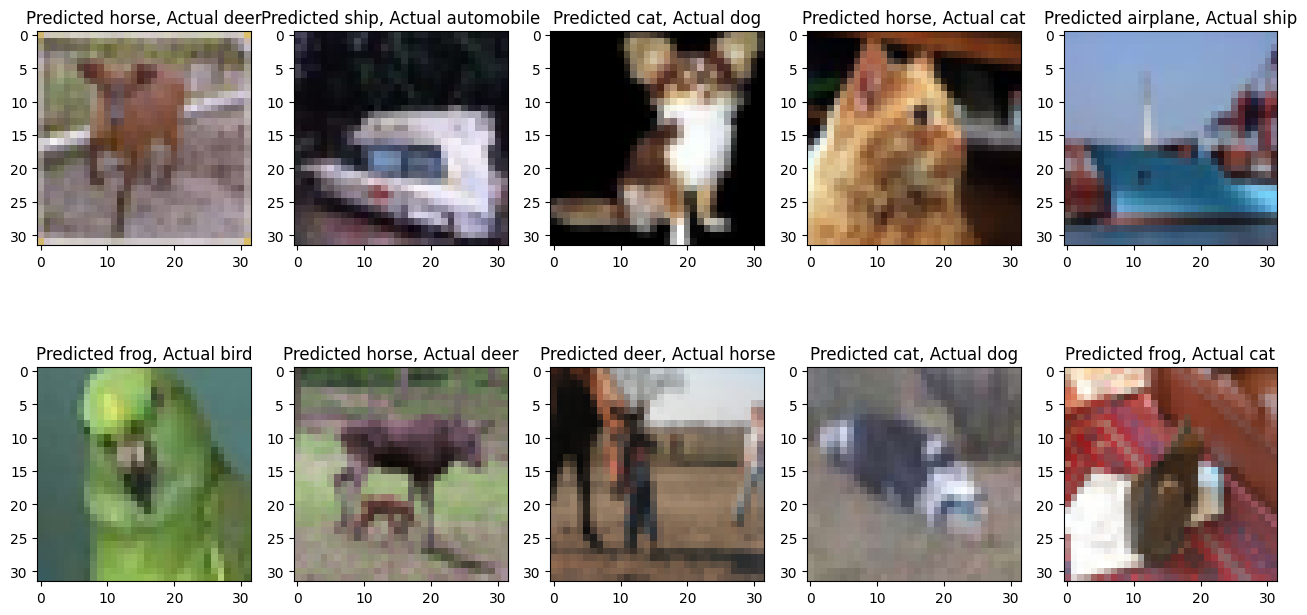

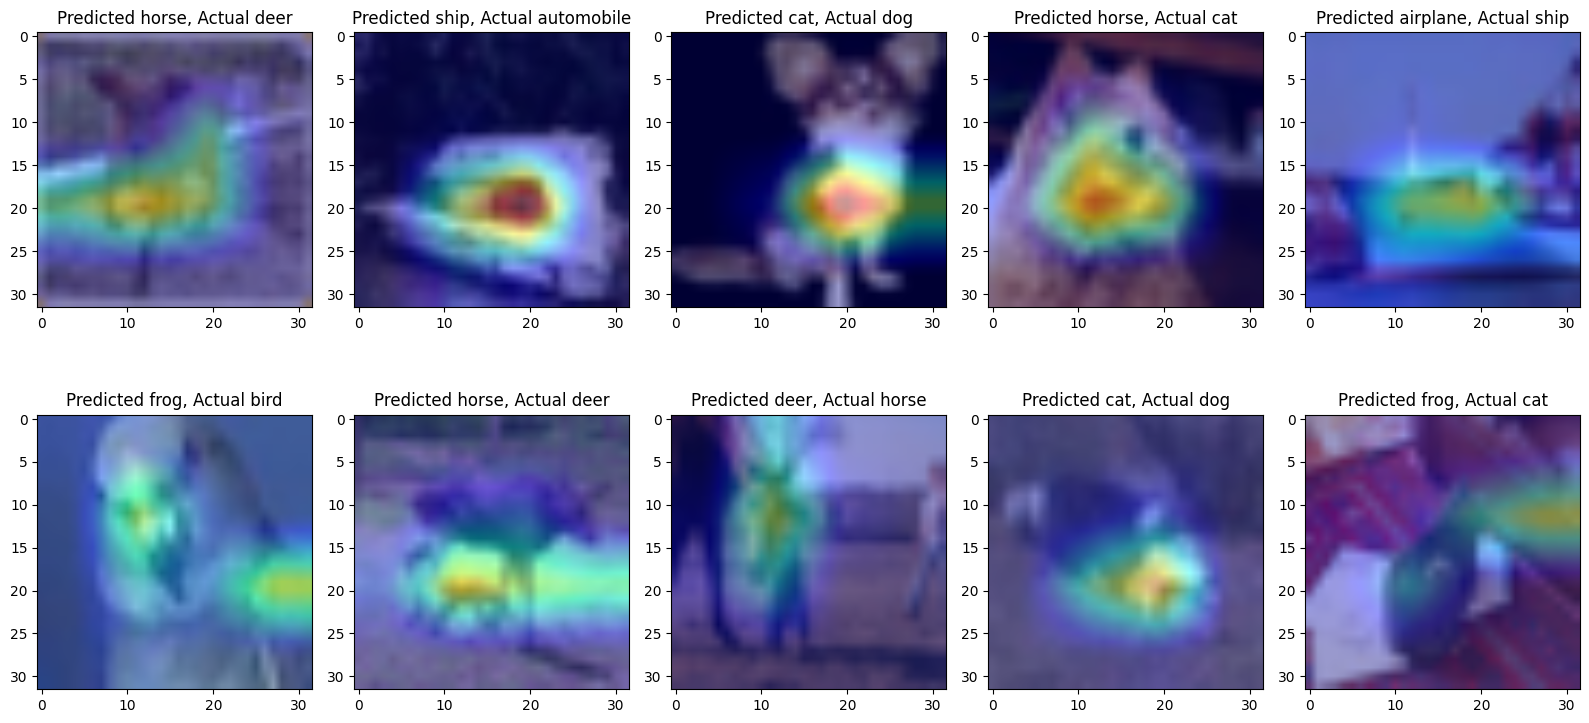

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_misclassified(10,model,test_loader,class_names,cam = True)